In [168]:
import tensorflow as tf
from tensorflow.keras import models, Sequential, layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
## SETTING UP HYPERPARAMETERS
BATCH_SIZE = 16
IMAGE_HEIGHT, IMAGE_WIDTH = 224, 224
CHANNELS = 3
SPLIT_RATIO = 0.2

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    "images/train",
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    
)

Found 3563 images belonging to 44 classes.


In [30]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

validation_generator = validation_datagen.flow_from_directory(
    'images/val',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
)

Found 430 images belonging to 44 classes.


In [162]:
485/16

30.3125

In [32]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    'images/test',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 485 images belonging to 44 classes.


In [88]:
class_names = list(train_generator.class_indices.keys())
print(f"output size: {len(class_names)}")
print(class_names)

output size: 44
['Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T2', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T2', 'Ependimoma T1', 'Ependimoma T1C+', 'Ependimoma T2', 'Ganglioglioma T1', 'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1', 'Germinoma T1C+', 'Germinoma T2', 'Glioblastoma T1', 'Glioblastoma T1C+', 'Glioblastoma T2', 'Granuloma T1', 'Granuloma T1C+', 'Granuloma T2', 'Meduloblastoma T1', 'Meduloblastoma T1C+', 'Meduloblastoma T2', 'Meningioma T1', 'Meningioma T1C+', 'Meningioma T2', 'Neurocitoma T1', 'Neurocitoma T1C+', 'Neurocitoma T2', 'Oligodendroglioma T1', 'Oligodendroglioma T1C+', 'Oligodendroglioma T2', 'Papiloma T1', 'Papiloma T1C+', 'Papiloma T2', 'Schwannoma T1', 'Schwannoma T1C+', 'Schwannoma T2', 'Tuberculoma T1', 'Tuberculoma T1C+', 'Tuberculoma T2', '_NORMAL T1', '_NORMAL T2']


In [34]:
#FINALLY MODEL BUILDING.

input_shape = (BATCH_SIZE, IMAGE_WIDTH, IMAGE_HEIGHT, 3) 
model = Sequential([
    layers.Conv2D(32, kernel_size= (5, 5), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)       

In [36]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=222,
        batch_size=BATCH_SIZE,
        validation_data=validation_generator,
        validation_steps=26,
        verbose=1,
        epochs=25,
)

Epoch 1/25
222/222 [==============================] - 69s 309ms/step - loss: 3.0721 - accuracy: 0.2081 - val_loss: 2.4838 - val_accuracy: 0.3510
Epoch 2/25
222/222 [==============================] - 55s 248ms/step - loss: 2.0288 - accuracy: 0.4660 - val_loss: 1.7781 - val_accuracy: 0.5216
Epoch 3/25
222/222 [==============================] - 65s 292ms/step - loss: 1.3699 - accuracy: 0.6293 - val_loss: 1.4187 - val_accuracy: 0.6226
Epoch 4/25
222/222 [==============================] - 50s 225ms/step - loss: 0.9702 - accuracy: 0.7254 - val_loss: 1.1314 - val_accuracy: 0.6779
Epoch 5/25
222/222 [==============================] - 50s 225ms/step - loss: 0.7255 - accuracy: 0.7936 - val_loss: 1.0643 - val_accuracy: 0.7212
Epoch 6/25
222/222 [==============================] - 50s 223ms/step - loss: 0.5280 - accuracy: 0.8452 - val_loss: 0.9470 - val_accuracy: 0.7428
Epoch 7/25
222/222 [==============================] - 53s 236ms/step - loss: 0.3882 - accuracy: 0.8836 - val_loss: 0.8277 - val_ac

In [242]:
scores = model.evaluate(test_generator)
scores

31/31 [==============================] - 6s 188ms/step - loss: 0.9494 - accuracy: 0.8454


[0.9494471549987793, 0.8453608155250549]

In [39]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 222}

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


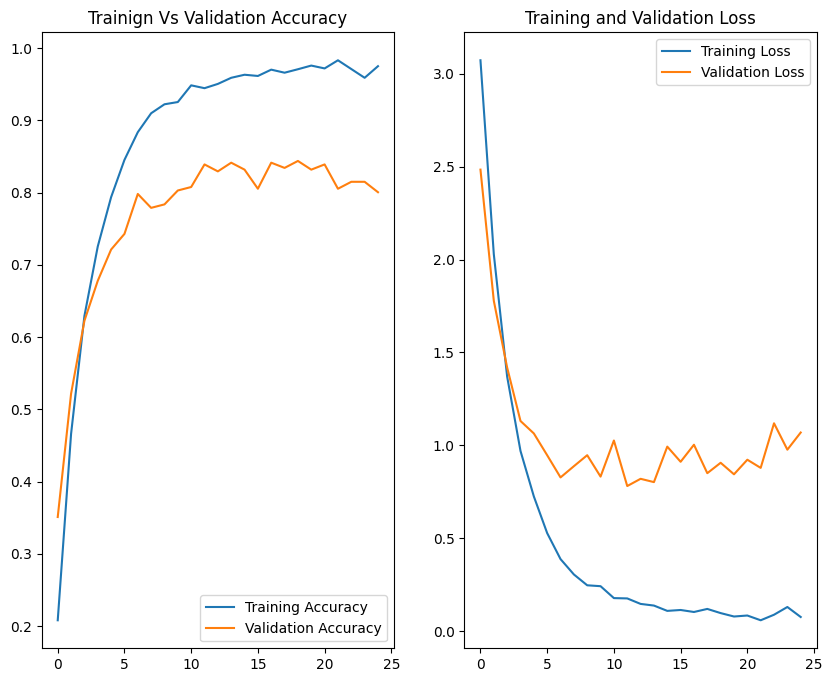

In [42]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Trainign Vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [238]:
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

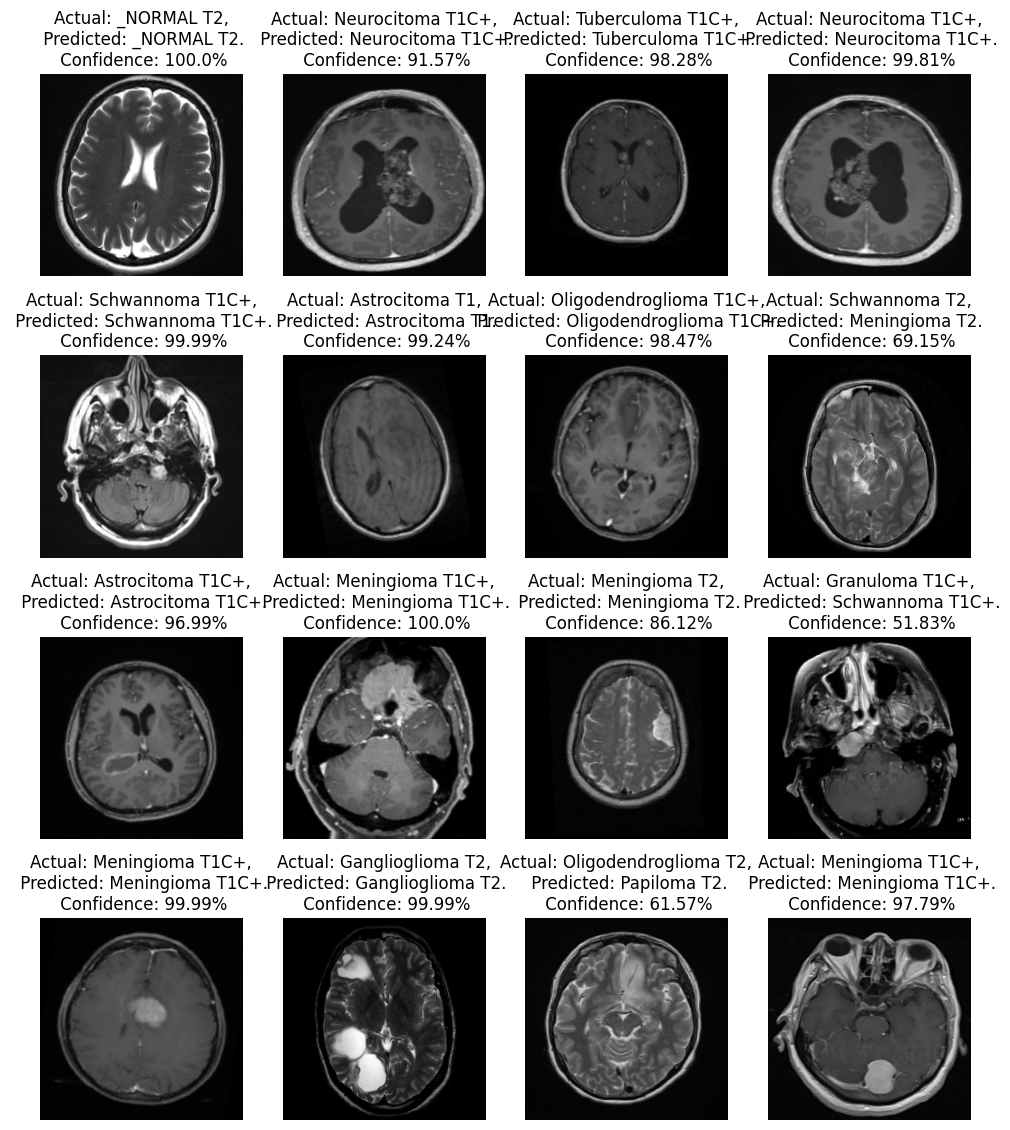

In [240]:
plt.figure(figsize=(12, 14))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [150]:
import os 
model_version=max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


In [151]:
model.save("../MRI.h5")